In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
# load the data
df = pd.read_csv('cinemaTicket_Ref.csv')
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [59]:
# convert date to datetime 
df['date'] = pd.to_datetime(df['date'])

In [60]:
print(df.dtypes)

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use               int64
capacity               float64
date            datetime64[ns]
month                    int64
quarter                  int64
day                      int64
dtype: object


Data preprocessing

In [61]:
df.isnull().sum() # check for missing values

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [62]:
# remove the rows with missing values
df = df.dropna()
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [63]:
df.describe() # get summary statistics

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
count,142399.000000,142399.000000,1.423990e+05,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399,142399.000000,142399.000000,142399.000000
mean,1518.989298,320.372369,1.234773e+07,140.177080,0.237389,3.933883,19.965986,81243.435624,139.939691,854.723605,2018-07-09 16:47:22.806480640,6.777218,2.634864,16.112220
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2018-02-21 00:00:00,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.280000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,2018-05-13 00:00:00,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79459.459459,50.000000,525.714286,2018-07-08 00:00:00,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.112000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,2018-09-02 00:00:00,9.000000,3.000000,24.000000
max,1589.000000,566.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,2018-11-04 00:00:00,11.000000,4.000000,31.000000
std,36.184162,159.650902,3.063471e+07,279.709174,2.924231,3.056853,22.653445,33237.373278,279.515104,953.118103,NaN,2.195050,0.809412,8.948638


In [64]:
# check if there any duplicate rows
df.duplicated().sum()

np.int64(104)

In [65]:
# remove the dubplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

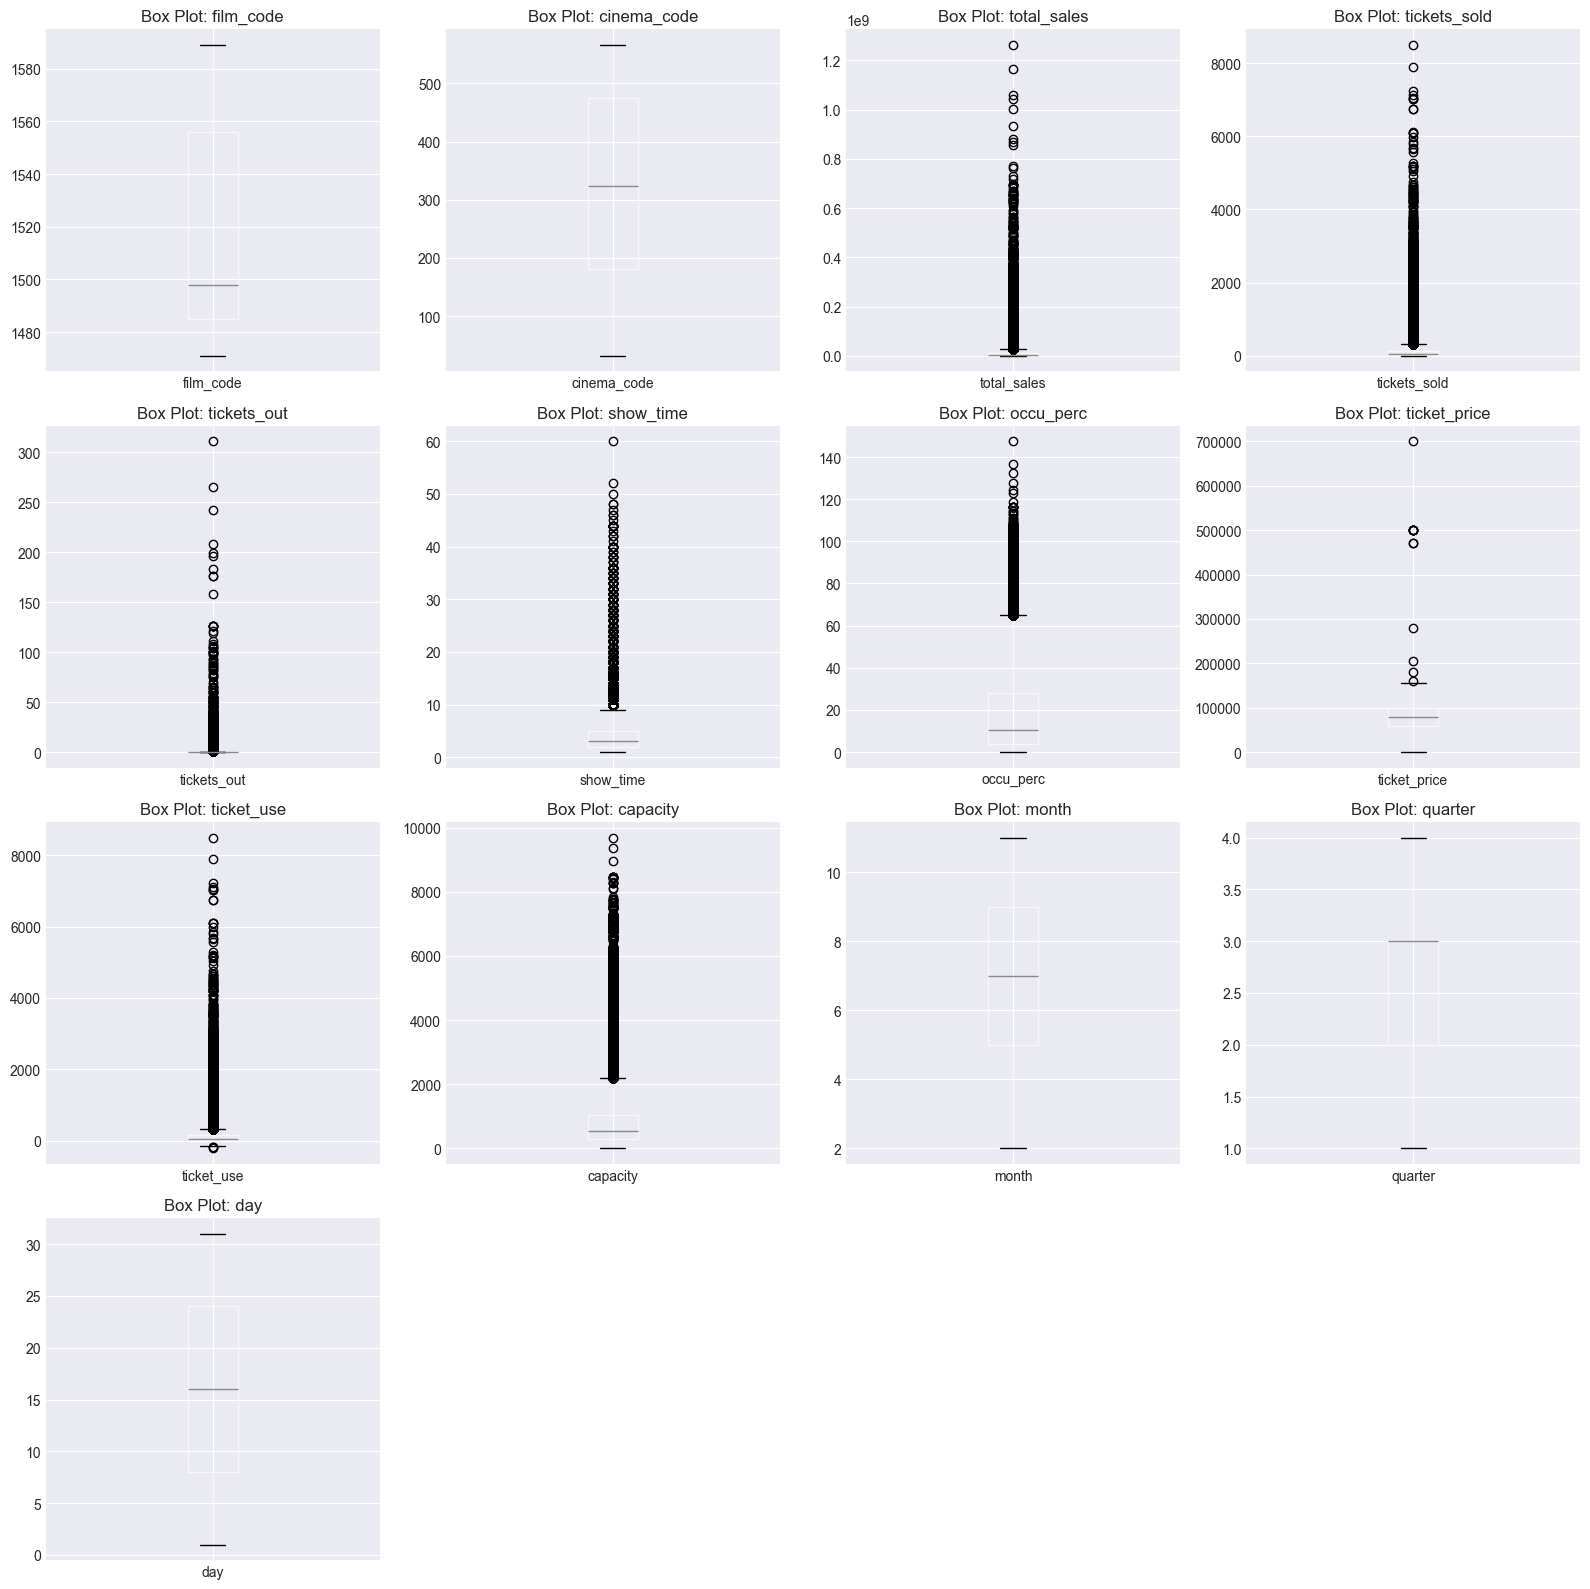

In [66]:
# Calculate subplot layout
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist() # select numerical columns

n_cols = len(numerical_columns)
n_rows = (n_cols + 3) // 4  # Adjust rows based on number of columns
fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(16, n_rows*4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

# Plot each column
for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')

# Hide unused subplots
for j in range(n_cols, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [67]:
# Detect outliers using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]



In [68]:
# Apply the function to numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_counts = {}

for col in numerical_columns:
    outliers_iqr = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers_iqr)
    print(f"Outliers in {col} (IQR method): {len(outliers_iqr)}")


Outliers in film_code (IQR method): 0
Outliers in cinema_code (IQR method): 0
Outliers in total_sales (IQR method): 16009
Outliers in tickets_sold (IQR method): 14983
Outliers in tickets_out (IQR method): 6114
Outliers in show_time (IQR method): 7344
Outliers in occu_perc (IQR method): 9624
Outliers in ticket_price (IQR method): 13
Outliers in ticket_use (IQR method): 14962
Outliers in capacity (IQR method): 12040
Outliers in month (IQR method): 0
Outliers in quarter (IQR method): 0
Outliers in day (IQR method): 0


In [69]:
# Display total outlier counts for each column
print("\nTotal outliers per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Total outliers per column:
film_code: 0
cinema_code: 0
total_sales: 16009
tickets_sold: 14983
tickets_out: 6114
show_time: 7344
occu_perc: 9624
ticket_price: 13
ticket_use: 14962
capacity: 12040
month: 0
quarter: 0
day: 0


In [70]:
# Define columns with significant outliers
outlier_columns = ['total_sales','tickets_sold','tickets_out','ticket_price','show_time','occu_perc','ticket_use','capacity']

# Count outliers using IQR
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return ((df[col] < lower) | (df[col] > upper)).sum()

# clip outliers
def clip_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

# verify correction
print("Clipping outliers using IQR...\n")

for col in outlier_columns:
    before = count_outliers_iqr(df, col)
    clip_outliers_iqr(df, col)
    after = count_outliers_iqr(df, col)

    print(f"{col}: {before} → {after}")

Clipping outliers using IQR...

total_sales: 16009 → 0
tickets_sold: 14983 → 0
tickets_out: 6114 → 0
ticket_price: 13 → 0
show_time: 7344 → 0
occu_perc: 9624 → 0
ticket_use: 14962 → 0
capacity: 12040 → 0


In [71]:
# Check data quality after cleaning
print("Dataset shape after cleaning:", df.shape)
print("\nSummary statistics after outlier clipping:")
print(df[outlier_columns].describe())


Dataset shape after cleaning: (142295, 14)

Summary statistics after outlier clipping:


        total_sales   tickets_sold  tickets_out   ticket_price      show_time  \
count  1.422950e+05  142295.000000     142295.0  142295.000000  142295.000000   
mean   7.630981e+06      98.248445          0.0   81215.199748       3.744763   
std    8.505581e+06     106.703748          0.0   33056.242185       2.364169   
min    2.000000e+04       1.000000          0.0     483.870968       1.000000   
25%    1.270000e+06      18.000000          0.0   60000.000000       2.000000   
50%    3.720000e+06      50.000000          0.0   79448.266667       3.000000   
75%    1.110000e+07     143.000000          0.0  100000.000000       5.000000   
max    2.584500e+07     330.500000          0.0  160000.000000       9.500000   

           occu_perc     ticket_use       capacity  
count  142295.000000  142295.000000  142295.000000  
mean       18.907991      98.083123     753.822176  
std        19.830146     106.703166     633.741890  
min         0.000000    -169.500000      -2.000000  
25%  

EDA

In [72]:
# Get total sales for each day (sum across all cinemas)
daily_sales = df.groupby('date')['total_sales'].sum()

# Check if we have enough data
print(f"{len(daily_sales)} days of data")

# Sort by date (oldest to newest)
daily_sales = daily_sales.sort_index()

print("\n SAMPLE DAILY SALES:")
for i in range(20):
    print(f"  {daily_sales.index[i].date()}: ${daily_sales.iloc[i]:,.0f}")

234 days of data

 SAMPLE DAILY SALES:
  2018-02-21: $25,845,000
  2018-02-23: $180,000
  2018-03-14: $1,442,170,000
  2018-03-15: $2,502,004,996
  2018-03-16: $3,077,211,998
  2018-03-17: $2,504,070,000
  2018-03-18: $2,569,395,000
  2018-03-19: $2,519,619,999
  2018-03-20: $259,605,000
  2018-03-21: $3,394,935,000
  2018-03-22: $5,191,935,000
  2018-03-23: $6,212,099,000
  2018-03-24: $6,974,140,000
  2018-03-25: $7,109,785,000
  2018-03-26: $7,414,720,000
  2018-03-27: $9,168,525,000
  2018-03-28: $8,546,759,999
  2018-03-29: $8,551,990,000
  2018-03-30: $8,780,050,000
  2018-03-31: $8,761,735,000


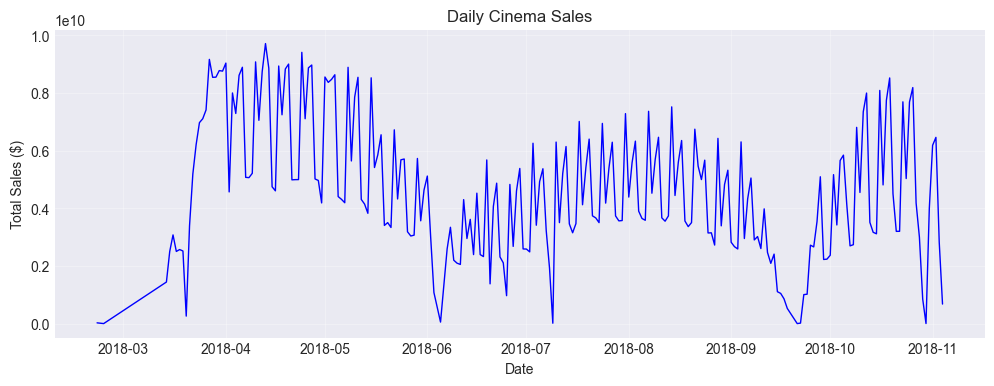

In [73]:
# Plot the raw data first
plt.figure(figsize=(12, 4))
plt.plot(daily_sales, 'b-', linewidth=1)
plt.title('Daily Cinema Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)
plt.show()

In [74]:
# Perform Decomposition
# Do the decomposition
result = seasonal_decompose(daily_sales,
                           model='multiplicative',
                           period=7)  # 7 days = weekly pattern
# Get the 3 parts
trend = result.trend
seasonal = result.seasonal
residual = result.resid

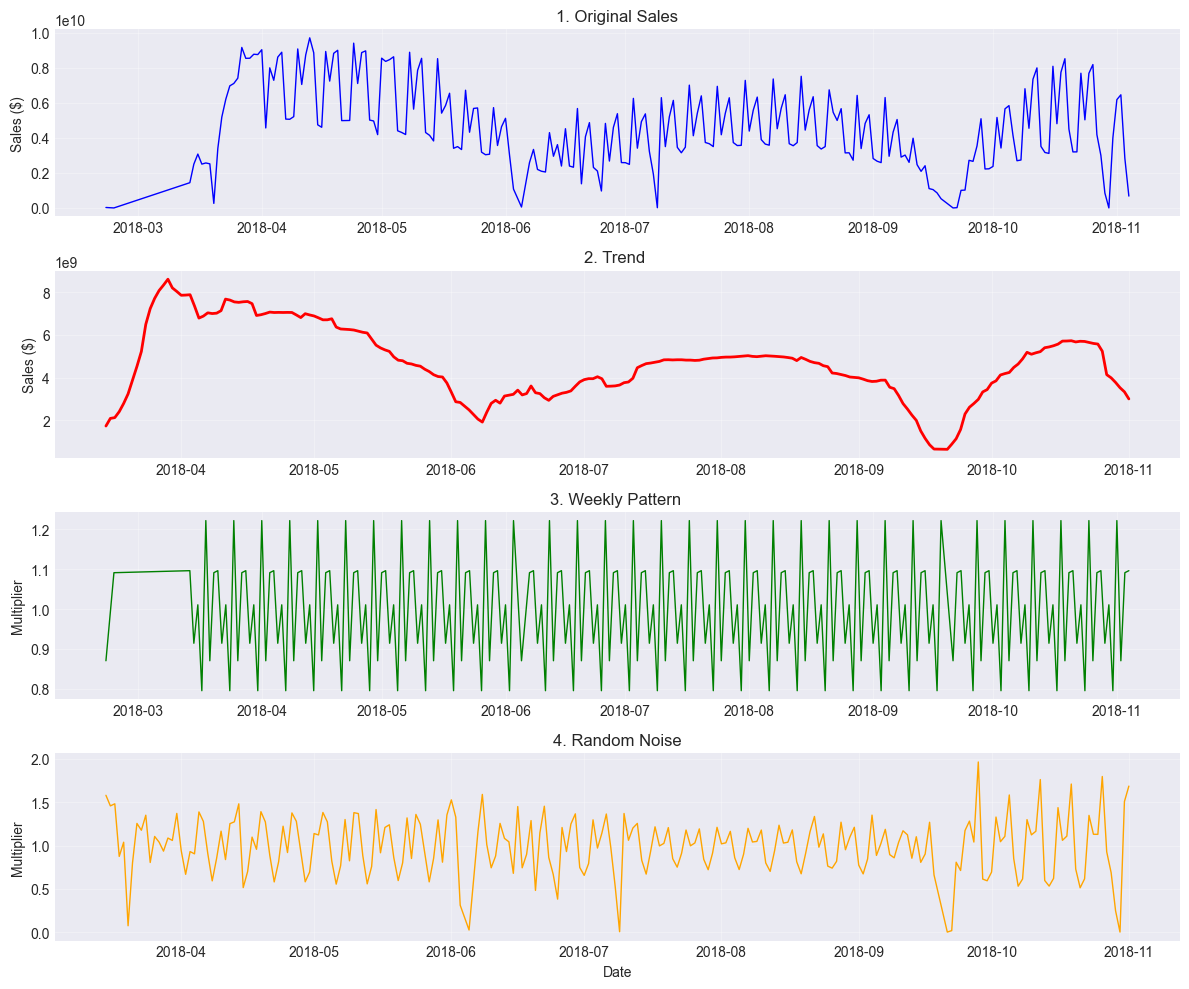

In [75]:
# Visualize Components

# Show all parts in one picture
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# 1. Original Data
axes[0].plot(daily_sales, 'b-', linewidth=1)
axes[0].set_title('1. Original Sales')
axes[0].set_ylabel('Sales ($)')
axes[0].grid(True, alpha=0.3)

# 2. Trend
axes[1].plot(trend, 'r-', linewidth=2)
axes[1].set_title('2. Trend ')
axes[1].set_ylabel('Sales ($)')
axes[1].grid(True, alpha=0.3)

# 3. Seasonality (weekly pattern)
axes[2].plot(seasonal, 'g-', linewidth=1) 
axes[2].set_title('3. Weekly Pattern ')
axes[2].set_ylabel('Multiplier')
axes[2].grid(True, alpha=0.3)

# 4. Residual/Noise
axes[3].plot(residual, 'orange', linewidth=1)
axes[3].set_title('4. Random Noise')
axes[3].set_ylabel('Multiplier')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [76]:
print(result.trend.isna().sum()) 

6


Periods of Rapid Growth:
  2018-03-24 → 2018-05-14
  2018-10-17 → 2018-10-19
  2018-10-21 → 2018-10-22

Periods of Rapid Decline:
  2018-03-15 → 2018-03-20
  2018-06-01 → 2018-06-18
  2018-06-20 → 2018-06-29
  2018-07-06 → 2018-07-06
  2018-09-08 → 2018-09-30
  2018-10-30 → 2018-11-01


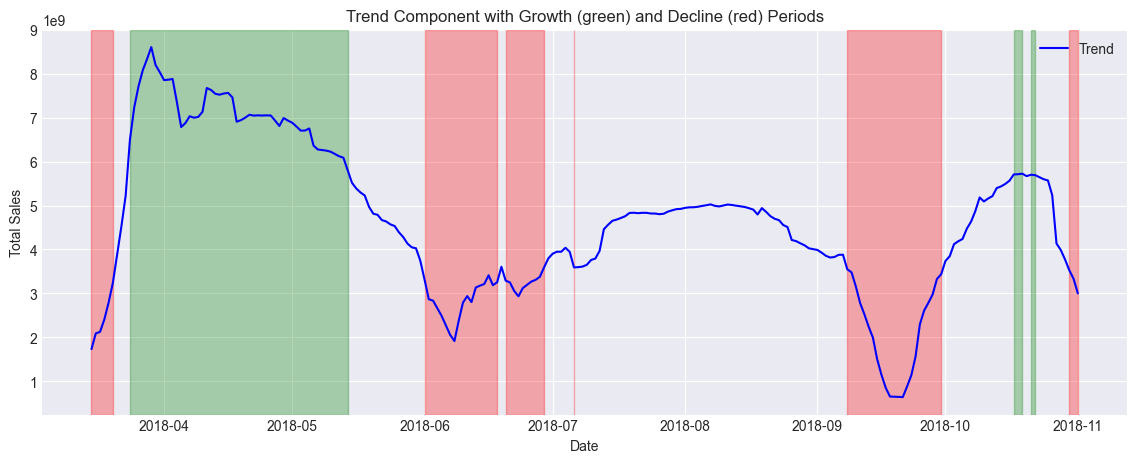

In [77]:
# Remove NaN from trend component
trend_data = result.trend.dropna()  

# Define growth and decline thresholds
upper_thresh = trend_data.quantile(0.75)
lower_thresh = trend_data.quantile(0.25)

# Create boolean masks
is_growth = trend_data > upper_thresh
is_decline = trend_data < lower_thresh

# Function to group consecutive True values into ranges
def get_ranges(mask):
    ranges = []
    start = None
    for date, flag in mask.items():
        if flag and start is None:
            start = date  # start of range
        elif not flag and start is not None:
            end = date - pd.Timedelta(days=1)  # end of range
            ranges.append((start, end))
            start = None
    # Handle last range if it goes till the end
    if start is not None:
        ranges.append((start, mask.index[-1]))
    return ranges

# Get ranges
growth_ranges = get_ranges(is_growth)
decline_ranges = get_ranges(is_decline)

# Print ranges
print("Periods of Rapid Growth:")
for start, end in growth_ranges:
    print(f"  {start.date()} → {end.date()}")

print("\nPeriods of Rapid Decline:")
for start, end in decline_ranges:
    print(f"  {start.date()} → {end.date()}")

# Plot trend with shaded ranges
plt.figure(figsize=(14,5))
plt.plot(trend_data, label='Trend', color='blue')

# Shade growth periods
for start, end in growth_ranges:
    plt.axvspan(start, end, color='green', alpha=0.3)

# Shade decline periods
for start, end in decline_ranges:
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.title("Trend Component with Growth (green) and Decline (red) Periods")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()


- Green areas = growth periods

There is a strong rise from mid‑March into May, and short growth again in late October. In these zones the blue line slopes upward, meaning cinema sales are increasing over time.

- Red areas = decline periods

Around June and again from early September to early October the red bands line up with a downward‑sloping trend. Here total sales are falling for several weeks in a row.

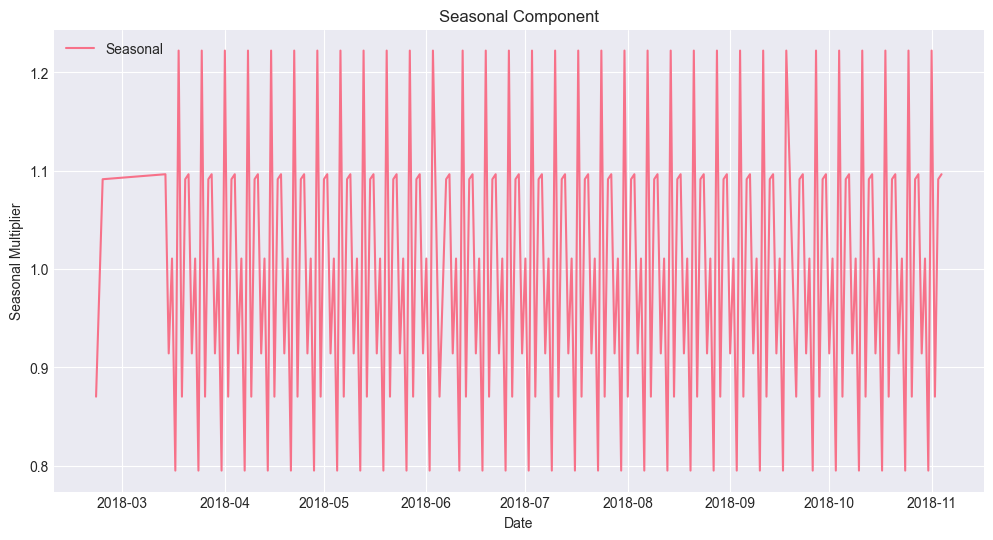

Seasonal Peaks (High Sales Periods):
  2018-03-18: 1.2221
  2018-03-25: 1.2221
  2018-04-01: 1.2221
  2018-04-08: 1.2221
  2018-04-15: 1.2221
  2018-04-22: 1.2221
  2018-04-29: 1.2221
  2018-05-06: 1.2221
  2018-05-13: 1.2221
  2018-05-20: 1.2221
  2018-05-27: 1.2221
  2018-06-03: 1.2221
  2018-06-12: 1.2221
  2018-06-19: 1.2221
  2018-06-26: 1.2221
  2018-07-03: 1.2221
  2018-07-10: 1.2221
  2018-07-17: 1.2221
  2018-07-24: 1.2221
  2018-07-31: 1.2221
  2018-08-07: 1.2221
  2018-08-14: 1.2221
  2018-08-21: 1.2221
  2018-08-28: 1.2221
  2018-09-04: 1.2221
  2018-09-11: 1.2221
  2018-09-18: 1.2221
  2018-09-27: 1.2221
  2018-10-04: 1.2221
  2018-10-11: 1.2221
  2018-10-18: 1.2221
  2018-10-25: 1.2221
  2018-11-01: 1.2221

Seasonal Troughs (Low Sales Periods):
  2018-03-17: 0.7950
  2018-03-24: 0.7950
  2018-03-31: 0.7950
  2018-04-07: 0.7950
  2018-04-14: 0.7950
  2018-04-21: 0.7950
  2018-04-28: 0.7950
  2018-05-05: 0.7950
  2018-05-12: 0.7950
  2018-05-19: 0.7950
  2018-05-26: 0.7950


In [78]:
# seasonality
plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Multiplier')
plt.legend()
plt.grid(True)
plt.show()

# Identify peaks and troughs
peaks = seasonal[seasonal > seasonal.quantile(0.75)]
troughs = seasonal[seasonal < seasonal.quantile(0.25)]

print("Seasonal Peaks (High Sales Periods):")
for date, value in peaks.items():
    print(f"  {date.date()}: {value:.4f}")

print("\nSeasonal Troughs (Low Sales Periods):")
for date, value in troughs.items():
    print(f"  {date.date()}: {value:.4f}")

Cinema sales data shows a clear weekly seasonality pattern. Thursday (day 4) has the highest total sales at $209 billion, while Monday (day 0) has the lowest at $99 billion. Weekdays average $8.3 million per day compared to $5.9 million on weekends, due to higher weekday transaction volume (101,647 vs 40,648 records). Thursday accounts for 20.9% of weekly sales, suggesting mid-week demand from after-work screenings. Saturdays and Sundays contribute 24% combined, showing steady weekend attendance. Focus marketing on Tuesday-Thursday for maximum ROI, weekends for family promotions.


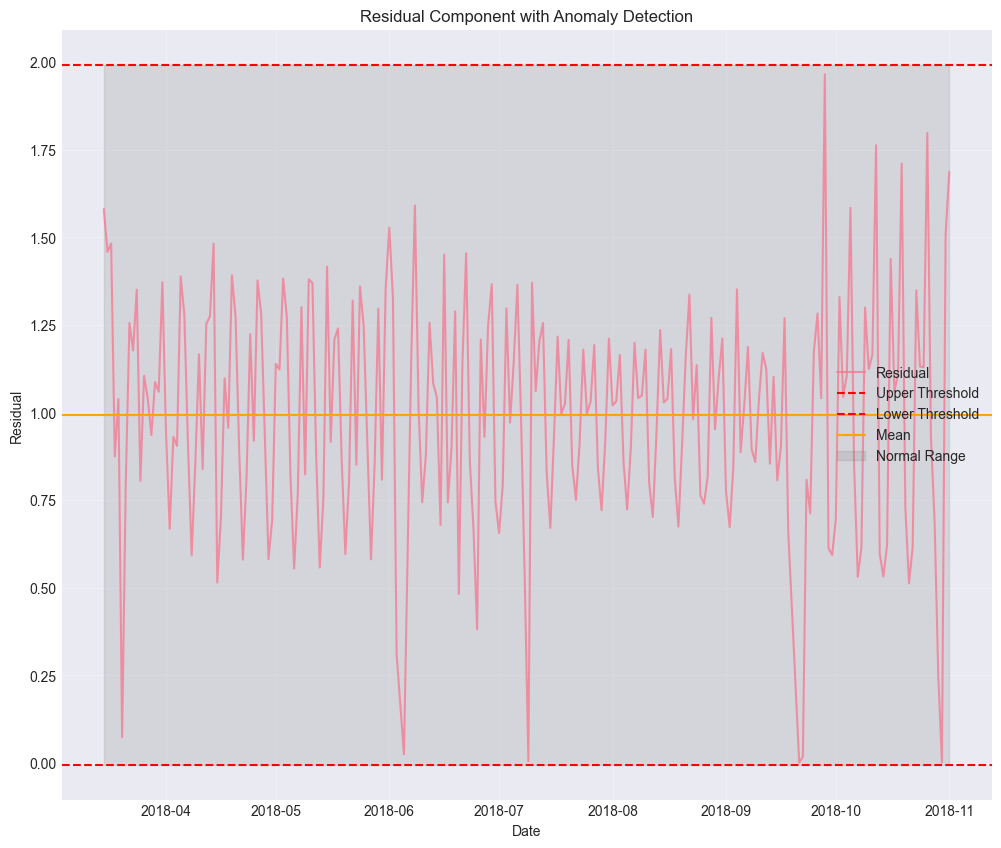

ANOMALIES DETECTED:
Total anomalies found: 0
High residuals (unusually high sales): 0
Low residuals (unusually low sales): 0


In [79]:
residual = result.resid.dropna()
plt.figure(figsize=(12, 10))

# Calculate anomaly thresholds (3 standard deviations)
mean_resid = residual.mean()
std_resid = residual.std()
upper_threshold = mean_resid + 3 * std_resid
lower_threshold = mean_resid - 3 * std_resid

plt.plot(residual.index, residual.values, label='Residual', alpha=0.7)
plt.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(y=lower_threshold, color='red', linestyle='--', label='Lower Threshold')
plt.axhline(y=mean_resid, color='orange', linestyle='-', label='Mean')
plt.fill_between(residual.index, upper_threshold, lower_threshold, alpha=0.2, color='gray', label='Normal Range')

plt.title('Residual Component with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Identify anomalies
anomalies_upper = residual[residual > upper_threshold]
anomalies_lower = residual[residual < lower_threshold]
all_anomalies = pd.concat([anomalies_upper, anomalies_lower])

print("ANOMALIES DETECTED:")
print(f"Total anomalies found: {len(all_anomalies)}")
print(f"High residuals (unusually high sales): {len(anomalies_upper)}")
print(f"Low residuals (unusually low sales): {len(anomalies_lower)}")


- There are no days where sales were unusually high or low compared to what the trend and seasonal patterns would predict.

- All fluctuations in your data fall within the expected range of normal variation

The cinema sales data is stable and does not show any significant unexpected events, data errors, or external factors affecting sales during the analyzed period.

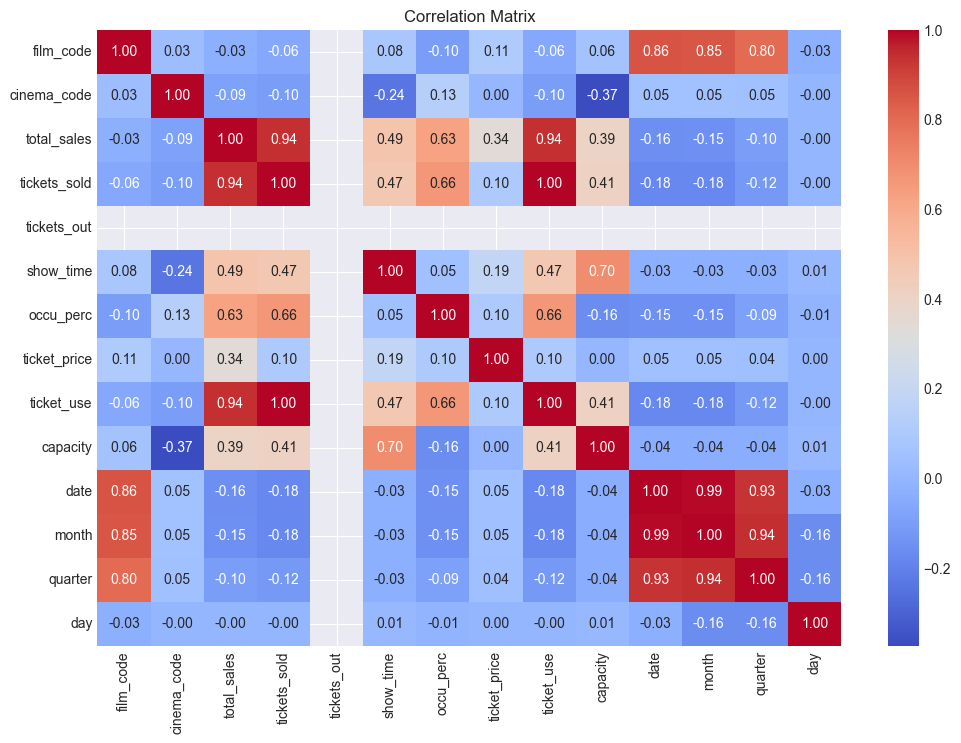

In [80]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## EDA 


1. TARGET VARIABLE: total_sales
--------------------------------------------------
Target Variable Statistics:
count    1.422950e+05
mean     7.630981e+06
std      8.505581e+06
min      2.000000e+04
25%      1.270000e+06
50%      3.720000e+06
75%      1.110000e+07
max      2.584500e+07
Name: total_sales, dtype: float64

Skewness: 1.19
Kurtosis: 0.00


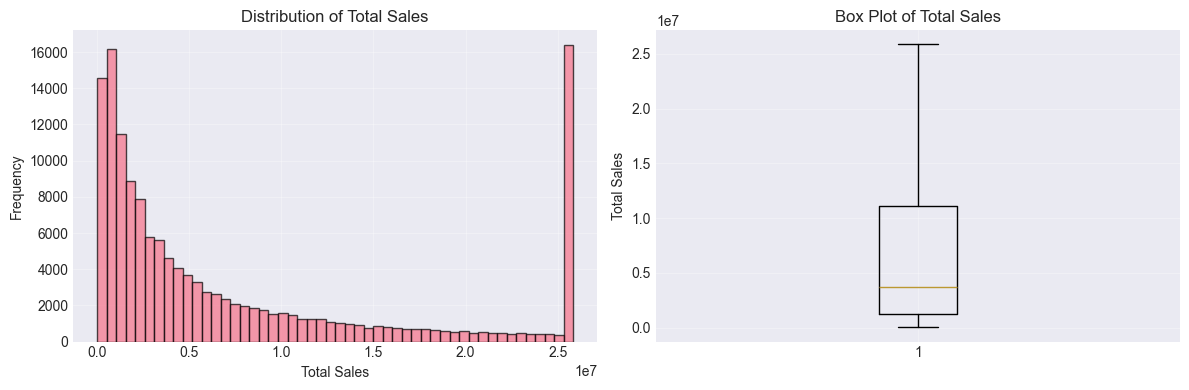

In [81]:
# 1. BASIC INFO & TARGET VARIABLE ANALYSIS
print("\n1. TARGET VARIABLE: total_sales")
print("-"*50)
print(f"Target Variable Statistics:")
print(df['total_sales'].describe())
print(f"\nSkewness: {df['total_sales'].skew():.2f}")
print(f"Kurtosis: {df['total_sales'].kurtosis():.2f}")

# Distribution of target variable
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['total_sales'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['total_sales'])
plt.title('Box Plot of Total Sales')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


2. FEATURE CORRELATION WITH TARGET
--------------------------------------------------
Correlation with Total Sales:
total_sales     1.000000
tickets_sold    0.938314
ticket_use      0.938141
occu_perc       0.625564
show_time       0.488048
capacity        0.394415
ticket_price    0.337102
day            -0.001120
film_code      -0.032941
cinema_code    -0.088682
quarter        -0.101699
month          -0.153040
date           -0.155133
tickets_out          NaN
Name: total_sales, dtype: float64


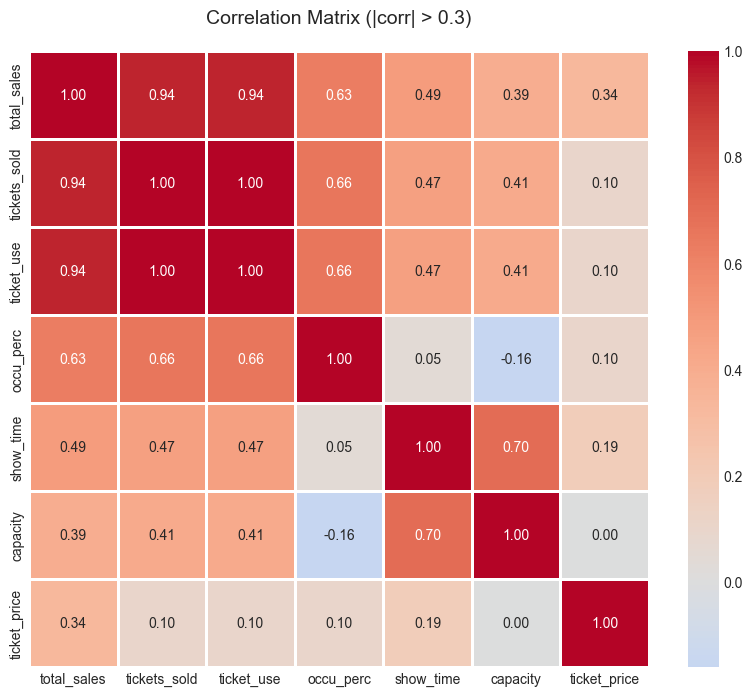

In [82]:
# 2. CORRELATION MATRIX (Most Important for Feature Selection)
print("\n2. FEATURE CORRELATION WITH TARGET")
print("-"*50)

# Calculate correlation with target
correlations = df.corr()['total_sales'].sort_values(ascending=False)
print("Correlation with Total Sales:")
print(correlations)

# Visualize correlation matrix (focused on high correlations)
plt.figure(figsize=(10, 8))
high_corr_cols = correlations[abs(correlations) > 0.3].index
sns.heatmap(df[high_corr_cols].corr(), annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix (|corr| > 0.3)', fontsize=14, pad=20)
plt.show()



4. TIME-BASED PATTERNS
--------------------------------------------------


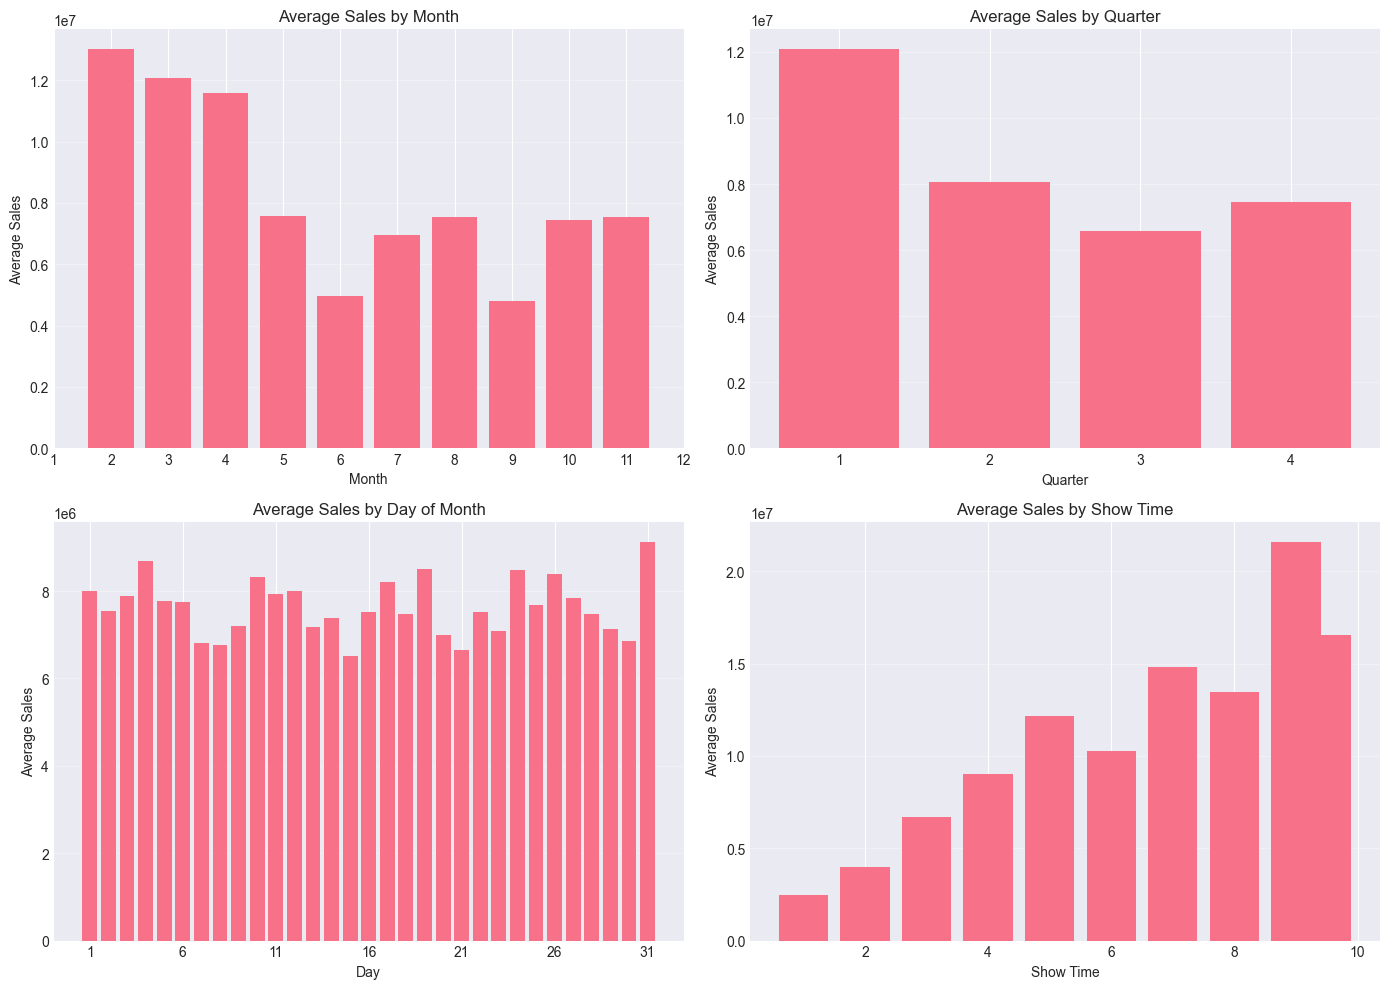

In [83]:
# 4. TEMPORAL PATTERNS (Time-based features)
print("\n4. TIME-BASED PATTERNS")
print("-"*50)

# Aggregate sales by time periods
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly sales
monthly_sales = df.groupby('month')['total_sales'].mean()
axes[0, 0].bar(monthly_sales.index, monthly_sales.values)
axes[0, 0].set_title('Average Sales by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Sales')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Quarterly sales
quarterly_sales = df.groupby('quarter')['total_sales'].mean()
axes[0, 1].bar(quarterly_sales.index, quarterly_sales.values)
axes[0, 1].set_title('Average Sales by Quarter')
axes[0, 1].set_xlabel('Quarter')
axes[0, 1].set_ylabel('Average Sales')
axes[0, 1].set_xticks(range(1, 5))
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Day of month pattern
day_sales = df.groupby('day')['total_sales'].mean()
axes[1, 0].bar(day_sales.index, day_sales.values)
axes[1, 0].set_title('Average Sales by Day of Month')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Average Sales')
axes[1, 0].set_xticks(range(1, 32, 5))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Show time pattern
showtime_sales = df.groupby('show_time')['total_sales'].mean().sort_index()
axes[1, 1].bar(showtime_sales.index, showtime_sales.values)
axes[1, 1].set_title('Average Sales by Show Time')
axes[1, 1].set_xlabel('Show Time')
axes[1, 1].set_ylabel('Average Sales')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


5. CATEGORICAL FEATURES ANALYSIS
--------------------------------------------------


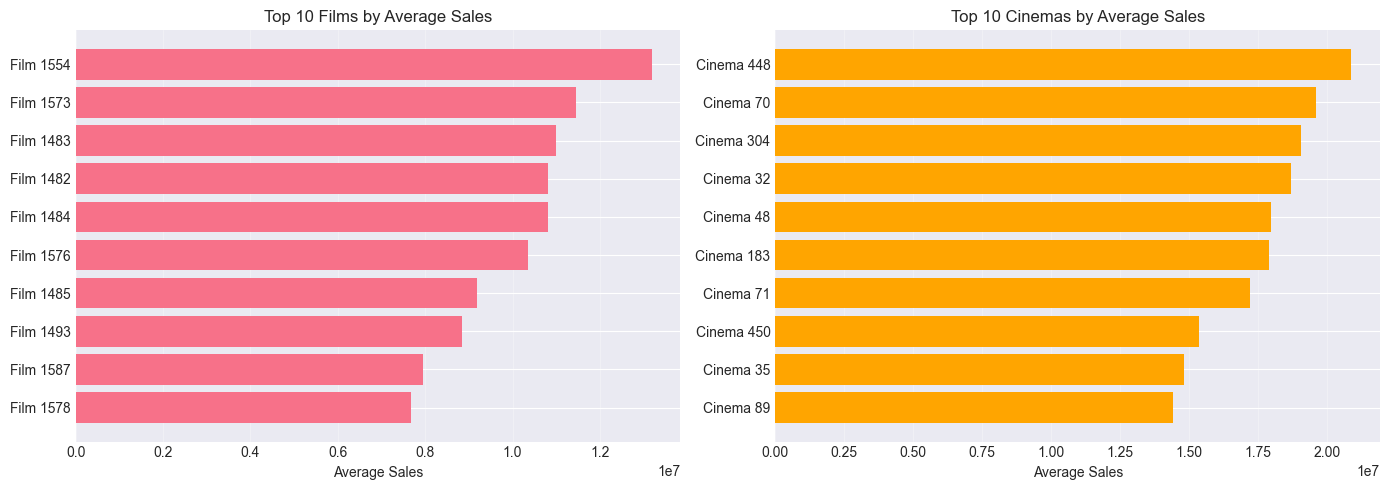

In [84]:
# 5. CATEGORICAL FEATURES IMPORTANCE
print("\n5. CATEGORICAL FEATURES ANALYSIS")
print("-"*50)

# Analyze film_code and cinema_code impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 films by average sales
film_performance = df.groupby('film_code')['total_sales'].mean().sort_values(ascending=False).head(10)
axes[0].barh(range(len(film_performance)), film_performance.values)
axes[0].set_yticks(range(len(film_performance)))
axes[0].set_yticklabels([f"Film {code}" for code in film_performance.index])
axes[0].set_xlabel('Average Sales')
axes[0].set_title('Top 10 Films by Average Sales')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Top 10 cinemas by average sales
cinema_performance = df.groupby('cinema_code')['total_sales'].mean().sort_values(ascending=False).head(10)
axes[1].barh(range(len(cinema_performance)), cinema_performance.values, color='orange')
axes[1].set_yticks(range(len(cinema_performance)))
axes[1].set_yticklabels([f"Cinema {code}" for code in cinema_performance.index])
axes[1].set_xlabel('Average Sales')
axes[1].set_title('Top 10 Cinemas by Average Sales')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

 Multicollinearity Check
Several features show very high correlations (corr > 0.8), which may indicate redundancy in the dataset:
- total_sales ↔ tickets_sold: 0.938
- total_sales ↔ ticket_use: 0.938
- tickets_sold ↔ ticket_use: 1.000 (perfect correlation)
- film_code ↔ date: 0.859
- film_code ↔ month: 0.851
- date ↔ month: 0.991
- film_code ↔ quarter: 0.801
- date ↔ quarter: 0.931
- month ↔ quarter: 0.942
- ticket_price ↔ revenue_per_ticket: 0.914
+ These strong correlations suggest that some variables may be interchangeable or could cause issues in regression models due to multicollinearity.

Business Metrics
- Average Revenue per Ticket: $78,975.29
- Average Capacity Utilization: 16.77%
- Average Occupancy Percentage: 18.91%


## Feature Engineering For linear and xgboost

In [85]:
# -------------------------------
# 1. Feature Engineering
# -------------------------------

df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].isin([4,5,6]).astype(int)
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter

# Lag features
df["lag_1"] = df["total_sales"].shift(1)
df["lag_7"] = df["total_sales"].shift(7)

# Rolling features
df["rolling_mean_7"] = df["total_sales"].rolling(7).mean()
df["rolling_std_7"] = df["total_sales"].rolling(7).std()

# Occupancy rate
df["occupancy_rate"] = df["tickets_sold"] / df["capacity"]

# Interaction features
df["revenue_per_ticket"] = df["tickets_sold"] * df["ticket_price"]
df["weekend_occupancy"] = df["occupancy_rate"] * df["is_weekend"]

df = df.dropna()

In [86]:
# -------------------------------
# 2. Define Features & Target (LEAKAGE-FREE)
# -------------------------------

target = "total_sales"

# Only features known BEFORE sales happen
features = [
    # Pricing & capacity (known in advance)
    "ticket_price",
    "capacity",
    "show_time",

    # Time-based features
    "day_of_week",
    "is_weekend",
    "month",
    "quarter",
    "year",

    # Categorical identifiers
    "cinema_code",
    "film_code",

    # Lag & rolling features (past information only)
    "lag_1",
    "lag_7",
    "rolling_mean_7",
    "rolling_std_7"
]

X = df[features].copy()
X["date"] = df["date"]   # keep date for plotting & alignment
y = df[target]


In [87]:
# -------------------------------
# 3. Preprocessing
# -------------------------------
categorical_features = ["cinema_code", "film_code"]
numeric_features = [col for col in features if col not in categorical_features]

# -------------------------------
# 4. Time-based Train/Test Split
# -------------------------------

# Sort by time
X = X.sort_values("date")
y = y.loc[X.index]

split_index = int(len(X) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print("Train period:", X_train["date"].min(), "→", X_train["date"].max())
print("Test period :", X_test["date"].min(), "→", X_test["date"].max())


Train period: 2018-02-21 00:00:00 → 2018-09-14 00:00:00
Test period : 2018-09-14 00:00:00 → 2018-11-04 00:00:00


# Linear Regression

In [88]:
# -------------------------------
# Preprocessing (DEFINE THIS FIRST)
# -------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ["cinema_code", "film_code"]

numeric_features = [
    "ticket_price",
    "capacity",
    "show_time",
    "day_of_week",
    "is_weekend",
    "month",
    "quarter",
    "year",
    "lag_1",
    "lag_7",
    "rolling_mean_7",
    "rolling_std_7"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [89]:
# -------------------------------
# 1. Train the Linear Regression model
# -------------------------------
linreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [90]:
# ============================================
# STEP 2: MAKE PREDICTIONS (Linear Regression)
# ============================================
print("\n4. MAKING PREDICTIONS (Linear Regression)")
print("-"*50)

# Predict for test period
y_pred_lr = linreg_pipeline.predict(X_test)
print(f"Made predictions for {len(y_pred_lr)} records")

# Create prediction dataframe
pred_df_lr = pd.DataFrame({
    "date": X_test["date"],
    "actual": y_test.values,
    "predicted": y_pred_lr
}).sort_values("date")

print("\nFirst 10 predictions (Linear Regression):")
print(pred_df_lr.head(10).to_string(index=False))


4. MAKING PREDICTIONS (Linear Regression)
--------------------------------------------------
Made predictions for 28458 records

First 10 predictions (Linear Regression):
      date  actual     predicted
2018-09-14 4000000  4.817548e+06
2018-09-14  980000  6.245674e+05
2018-09-14 1020000  4.616325e+05
2018-09-14 1040000 -4.542700e+05
2018-09-14 1080000  6.782670e+05
2018-09-14 1100000  1.555680e+05
2018-09-14 1120000  8.957955e+05
2018-09-14 1400000  1.866656e+06
2018-09-14  960000  2.337583e+05
2018-09-14 2080000  2.030220e+06


In [91]:
# -------------------------------
# 3. Model evaluation
# -------------------------------
print("=== Linear Regression Performance ===")
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_accuracy = 100 * (1 - lr_mae / np.mean(y_test))  # custom accuracy %

print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R²:", lr_r2)
print("Accuracy:", f"{lr_accuracy:.2f}%")

=== Linear Regression Performance ===
RMSE: 2092619.689329844
MAE: 1184604.2349688157
R²: 0.9324637948717207
Accuracy: 82.37%


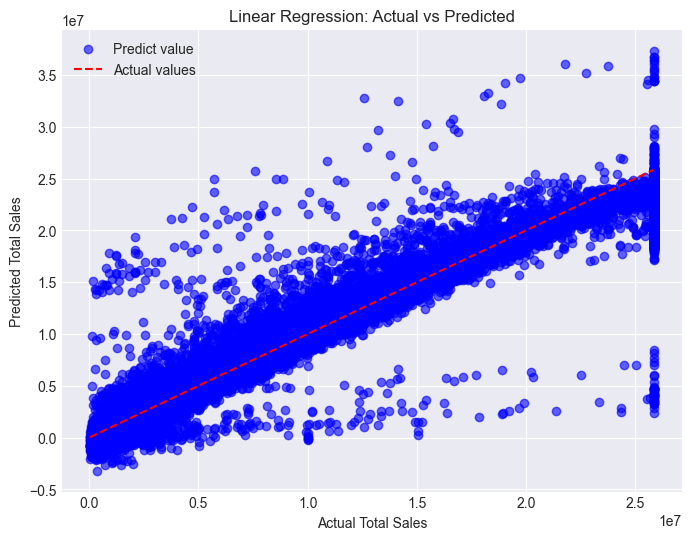

In [92]:
# -------------------------------
# 4. Visualize results

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color="blue", label="Predict value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--", label="Actual values")

plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

# Xgboost

In [93]:
from xgboost import XGBRegressor
# -------------------------------
# 1. Train the XGBoost model
# -------------------------------
# Use the same train/test split from earlier to avoid inconsistent lengths
# Fit the preprocessor on the training portion only (prevents data leakage)
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_enc, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.8
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [94]:
# ============================================
# STEP 2: MAKE PREDICTIONS (XGBoost)
# ============================================
print("\n4. MAKING PREDICTIONS (XGBoost)")
print("-"*50)

# Predict for test period
y_pred_xgb = xgb_model.predict(X_test_enc)
print(f"Made predictions for {len(y_pred_xgb)} records")

# Create prediction dataframe (use X_test's date column so dates align)
pred_df_xgb = pd.DataFrame({
    "date": X_test["date"],
    "actual": y_test.values,
    "predicted": y_pred_xgb
}).sort_values("date")

print("\nFirst 10 predictions (XGBoost):")
print(pred_df_xgb.head(10).to_string(index=False))


4. MAKING PREDICTIONS (XGBoost)
--------------------------------------------------
Made predictions for 28458 records

First 10 predictions (XGBoost):
      date  actual    predicted
2018-09-14 4000000 3808047.2500
2018-09-14  980000  974110.6875
2018-09-14 1020000  980714.0000
2018-09-14 1040000  999207.7500
2018-09-14 1080000 1019868.5625
2018-09-14 1100000 1067536.2500
2018-09-14 1120000 1243230.8750
2018-09-14 1400000 1378938.1250
2018-09-14  960000  966409.2500
2018-09-14 2080000 2154059.5000


In [95]:
# -------------------------------
# 3. Model evaluation
# -------------------------------
print("\n=== XGBoost Performance ===")
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_accuracy = 100 * (1 - xgb_mae / np.mean(y_test))  # custom accuracy %

print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R²:", xgb_r2)
print("Accuracy:", f"{xgb_accuracy:.2f}%")


=== XGBoost Performance ===
RMSE: 743724.2809536341
MAE: 282834.6875
R²: 0.9914693832397461
Accuracy: 95.79%


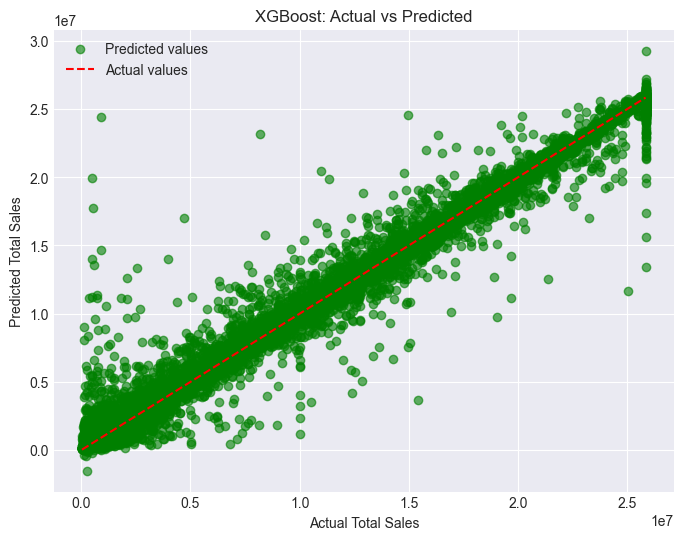

In [96]:
# -------------------------------
# 4. Visualize results
# -------------------------------
plt.figure(figsize=(8,6))

# Scatter points = predictions vs actual
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="green", label="Predicted values")

# Red dashed line = perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--", label="Actual values")

plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("XGBoost: Actual vs Predicted")
plt.legend()  
plt.show()

## Why This Dataset Works Well with Linear Regression and XGBoost, but Not ARIMA

### The Dataset
This dataset is not just a single time series. It includes many different features such as:
- Tickets sold, ticket price, and capacity
- Cinema and film codes
- Day of week, month, quarter, and year
- Lagged sales and rolling averages
- Occupancy rate and revenue per ticket

Because of these extra features, the dataset is **multivariate** (many variables), not just one column of sales numbers over time.

---

### Why Linear Regression Works
- Linear Regression can use all these features at once to explain sales.
- It shows how each variable (like ticket price or weekend flag) affects sales.
- It is simple and interpretable, making it easy to understand the contribution of each feature.

---

### Why XGBoost Works
- XGBoost is a powerful model that can handle both numerical and categorical features.
- It captures complex, non-linear relationships (for example, how weekends and ticket price interact).
- It works very well with structured tabular data like this dataset, often giving higher accuracy.

---

### Why ARIMA Does Not Work Well
- ARIMA is designed for one-dimensional time series, where the only input is past values of sales.
- It does not naturally use external features such as ticket price, film code, or occupancy.
- Since this dataset relies heavily on those explanatory features, ARIMA ignores most of the useful information.
- As a result, ARIMA cannot capture the full picture and performs worse compared to regression and XGBoost.

## Feature Engineering for arima/sarima

## Why SARIMA Can Be Used When ARIMA Struggles

### ARIMA Limitations
ARIMA is designed for univariate time series forecasting. It models a series only by its past values and error terms. In datasets with strong seasonal patterns (like cinema sales that vary by weekends, holidays, or months), plain ARIMA cannot capture those repeating cycles.

### Why SARIMA Helps
SARIMA (Seasonal ARIMA) extends ARIMA by adding seasonal components. It can model:
- Weekly seasonality (weekends vs weekdays)
- Monthly or quarterly cycles
- Holiday or event-driven patterns

This makes SARIMA more suitable for datasets where sales repeat in predictable seasonal patterns. While Linear Regression and XGBoost use explanatory features (like ticket price, film code, or occupancy), SARIMA focuses on **time-based seasonality**. It does not use external predictors, but it can still capture repeating cycles in the sales data.

In [97]:
# --------------------------------------------
# 0. Input: df must have ['date','total_sales'] plus explanatory features
# --------------------------------------------
df["date"] = pd.to_datetime(df["date"])

# Aggregate sales per day (if multiple rows per date)
daily_df = (
    df.groupby("date", as_index=False)
      .agg({
          "total_sales": "sum",
          "tickets_sold": "sum",
          "capacity": "sum",
          "ticket_price": "mean",
          "occu_perc": "mean",
          "is_weekend": "max"
      })
      .sort_values("date")
)

# Set daily frequency
daily_df = daily_df.set_index("date").asfreq("D")

# Fill missing values
daily_df["total_sales"] = daily_df["total_sales"].fillna(method="ffill")
daily_df = daily_df.fillna(0)

In [98]:
# --------------------------------------------
# 1. Train/Test Split (last 7 days as test set)
# --------------------------------------------
train_data = daily_df.iloc[:-7]
test_data = daily_df.iloc[-7:]

y_train = train_data["total_sales"]
y_test = test_data["total_sales"]

# Exogenous features (aligned with train/test)
exog_features = ["tickets_sold", "capacity", "ticket_price", "occu_perc", "is_weekend"]
X_train_exog = train_data[exog_features]
X_test_exog = test_data[exog_features]

print(f"Train period: {train_data.index.min().date()} to {train_data.index.max().date()} ({len(train_data)} days)")
print(f"Test period:  {test_data.index.min().date()} to {test_data.index.max().date()} ({len(test_data)} days)")

Train period: 2018-02-21 to 2018-10-28 (250 days)
Test period:  2018-10-29 to 2018-11-04 (7 days)


In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# --------------------------------------------
# 2. Model training (SARIMAX with weekly seasonality)
# --------------------------------------------
sarimax_model = SARIMAX(
    y_train,
    exog=X_train_exog,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),   # 7-day seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_result = sarimax_model.fit(disp=False)

In [100]:
# --------------------------------------------
# 3. Make predictions (7-day horizon)
# --------------------------------------------
print("\n4. MAKING PREDICTIONS (SARIMAX)")
print("-" * 50)

predictions = sarimax_result.predict(
    start=len(y_train),
    end=len(y_train)+len(y_test)-1,
    exog=X_test_exog
)

pred_df = pd.DataFrame({
    "date": y_test.index,
    "actual": y_test.values,
    "predicted": predictions.values
})

print("\nPredictions for 7-day test period (SARIMAX):")
print(pred_df.to_string(index=False))


4. MAKING PREDICTIONS (SARIMAX)
--------------------------------------------------

Predictions for 7-day test period (SARIMAX):
      date       actual     predicted
2018-10-29  850956000.0  1.434400e+09
2018-10-30    2070000.0 -1.309707e+09
2018-10-31 3996648000.0  4.130218e+09
2018-11-01 6186414998.0  6.274286e+09
2018-11-02 6462370000.0  6.652669e+09
2018-11-03 2831635000.0  2.926829e+09
2018-11-04  677710000.0  1.340304e+09


In [101]:
# --------------------------------------------
# 4. Model evaluation
# --------------------------------------------
sarima_rmse = np.sqrt(mean_squared_error(y_test, predictions))
sarima_mae = mean_absolute_error(y_test, predictions)
sarima_r2 = r2_score(y_test, predictions)
sarima_accuracy = 100 * (1 - sarima_mae / np.mean(y_test))

print("\n=== SARIMAX Performance (7-day test) ===")
print("RMSE:", sarima_rmse)
print("MAE:", sarima_mae)
print("R²:", sarima_r2)
print("Accuracy:", f"{sarima_accuracy:.2f}%")


=== SARIMAX Performance (7-day test) ===
RMSE: 606045184.9486476
MAE: 437821383.6987823
R²: 0.9390199317453881
Accuracy: 85.41%


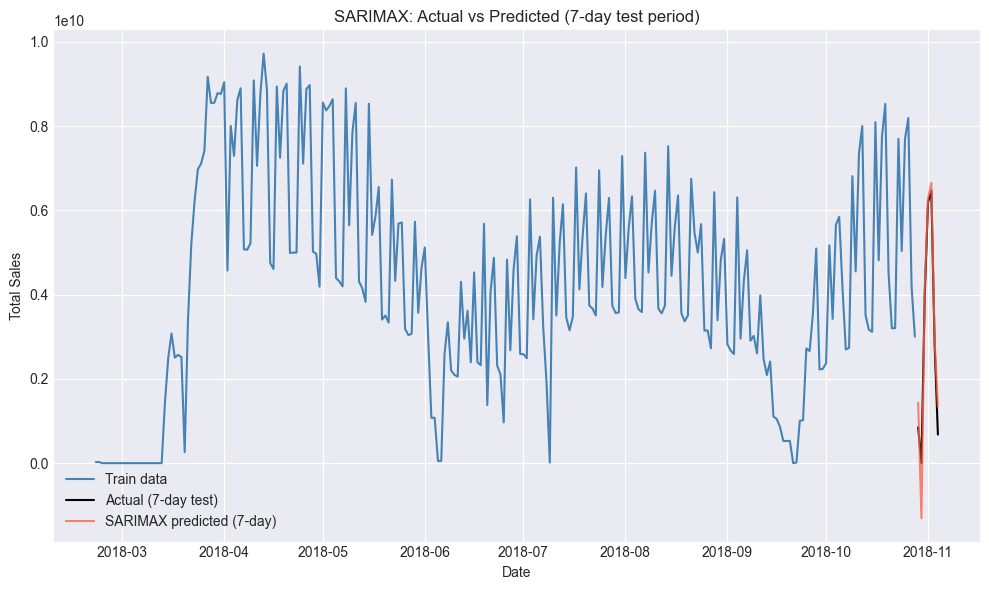

In [102]:
# --------------------------------------------
# 5. Visualize results
# --------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_train.index, y_train, label="Train data", color="steelblue")
plt.plot(y_test.index, y_test, label="Actual (7-day test)", color="black")
plt.plot(y_test.index, predictions, label="SARIMAX predicted (7-day)", color="tomato", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("SARIMAX: Actual vs Predicted (7-day test period)")
plt.legend()
plt.tight_layout()
plt.show()

## Model Training auto arima


In [103]:
# --------------------------------------------
# 0. Input: df must have ['date','total_sales']
# --------------------------------------------
df["date"] = pd.to_datetime(df["date"])

# Aggregate sales per day (if multiple rows per date)
daily_df = (
    df.groupby("date", as_index=False)["total_sales"]
      .sum()
      .sort_values("date")
)

# Set daily frequency
daily_df = daily_df.set_index("date").asfreq("D")

# Fill missing values
daily_df["total_sales"] = daily_df["total_sales"].fillna(method="ffill")

In [104]:
# --------------------------------------------
# 1. Train/Test Split (last 7 days as test set)
# --------------------------------------------
train_data = daily_df.iloc[:-7]["total_sales"]
test_data = daily_df.iloc[-7:]["total_sales"]

print(f"Train period: {train_data.index.min().date()} to {train_data.index.max().date()} ({len(train_data)} days)")
print(f"Test period:  {test_data.index.min().date()} to {test_data.index.max().date()} ({len(test_data)} days)")

Train period: 2018-02-21 to 2018-10-28 (250 days)
Test period:  2018-10-29 to 2018-11-04 (7 days)


In [105]:
# --------------------------------------------
# 2. Model training (Auto ARIMA with weekly seasonality)
# --------------------------------------------
from pmdarima import auto_arima
auto_model = auto_arima(
    train_data,
    seasonal=True,
    m=7,                # weekly seasonality
    stepwise=True,
    suppress_warnings=True,
    trace=True           # prints the search process
)

print("\nBest Auto ARIMA model summary:")
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=11548.479, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=11274.169, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=11394.851, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=11876.415, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=11390.204, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=11275.614, Time=0.40 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=11267.067, Time=0.26 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=11295.843, Time=0.06 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=11258.016, Time=0.49 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=11267.600, Time=0.32 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(2,0,0)(1,0,2)[7] intercept   : AIC=1

In [106]:
# --------------------------------------------
# 3. Make predictions (7-day horizon)
# --------------------------------------------
print("\n4. MAKING PREDICTIONS (Auto ARIMA)")
print("-" * 50)

predictions = auto_model.predict(n_periods=len(test_data))

pred_df = pd.DataFrame({
    "date": test_data.index,
    "actual": test_data.values,
    "predicted": predictions
})

print("\nPredictions for 7-day test period (Auto ARIMA):")
print(pred_df.to_string(index=False))


4. MAKING PREDICTIONS (Auto ARIMA)
--------------------------------------------------

Predictions for 7-day test period (Auto ARIMA):
      date       actual    predicted
2018-10-29  850956000.0 3.179251e+09
2018-10-30    2070000.0 7.116426e+09
2018-10-31 3996648000.0 4.602043e+09
2018-11-01 6186414998.0 7.002625e+09
2018-11-02 6462370000.0 7.508042e+09
2018-11-03 2831635000.0 4.136206e+09
2018-11-04  677710000.0 3.123907e+09



=== Auto ARIMA Performance (7-day test) ===
RMSE: 3067035227.721185
MAE: 2237242337.2482758
R²: -0.5617640602780936
Accuracy: 25.45%


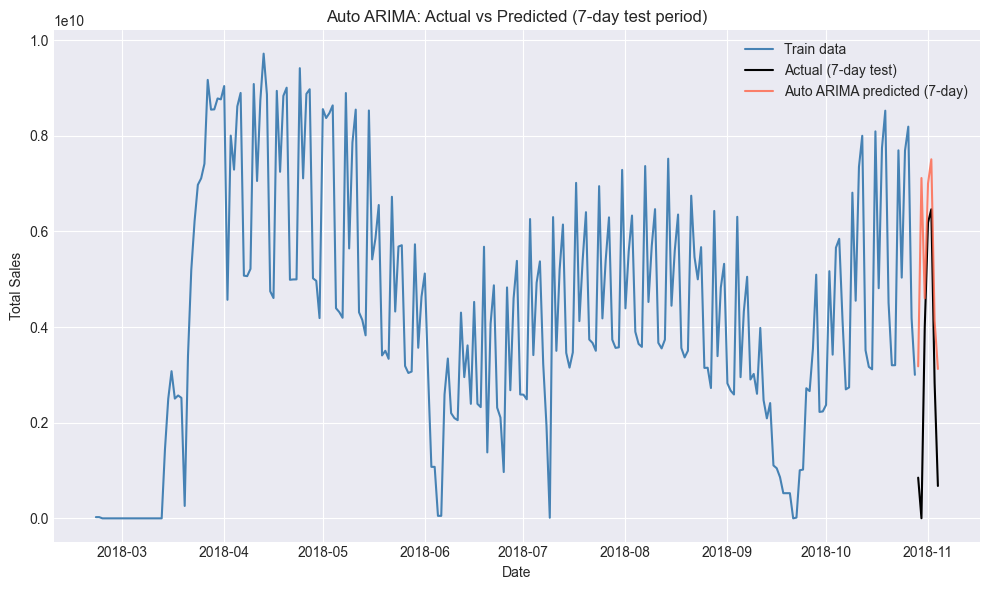

In [107]:
# --------------------------------------------
# 4. Model evaluation
# --------------------------------------------
auto_rmse = np.sqrt(mean_squared_error(test_data, predictions))
auto_mae = mean_absolute_error(test_data, predictions)
auto_r2 = r2_score(test_data, predictions)
auto_accuracy = 100 * (1 - auto_mae / np.mean(test_data))

print("\n=== Auto ARIMA Performance (7-day test) ===")
print("RMSE:", auto_rmse)
print("MAE:", auto_mae)
print("R²:", auto_r2)
print("Accuracy:", f"{auto_accuracy:.2f}%")

# --------------------------------------------
# 5. Visualize results
# --------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label="Train data", color="steelblue")
plt.plot(test_data.index, test_data, label="Actual (7-day test)", color="black")
plt.plot(test_data.index, predictions, label="Auto ARIMA predicted (7-day)", color="tomato", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Auto ARIMA: Actual vs Predicted (7-day test period)")
plt.legend()
plt.tight_layout()
plt.show()

Why ARIMA Still Performs Poorly on our Dataset
ARIMA is built for one type of data: a single time series where the future depends mostly on the past values. It works best when patterns are smooth and repeat regularly, like daily temperature or monthly electricity demand.
Your cinema dataset is very different:
- Too many outside factors
Sales don’t just depend on yesterday’s numbers. They depend on ticket price, film type, promotions, holidays, and occupancy. ARIMA doesn’t naturally use these extra features, so it misses the real drivers of sales.
- Sudden changes
Cinema sales can jump when a blockbuster is released or drop when a weak film is showing. ARIMA expects gradual changes, so it struggles with these sharp ups and downs.
- Complex seasonality
You have weekly cycles (weekends vs weekdays), monthly cycles, and holiday effects. ARIMA can only handle simple seasonality. Even SARIMA or Auto ARIMA can’t fully capture multiple overlapping cycles.
- Feature‑rich dataset
Models like Linear Regression and XGBoost can use all the explanatory features at once. ARIMA is mostly blind to them, so it always starts at a disadvantage.


## Model Comparison and evaluation

In [ ]:
print("MODEL COMPARISON: 4 APPROACHES")
print("=" * 50)

# Define features and target
target = "total_sales"
features = [
    "tickets_sold", "ticket_use", "occu_perc", "show_time",
    "capacity", "ticket_price", "cinema_code", "film_code",
    "day_of_week", "is_weekend", "month", "quarter", "year",
    "lag_1", "lag_7", "rolling_mean_7", "rolling_std_7",
    "occupancy_rate", "revenue_per_ticket", "weekend_occupancy"
]

categorical = ["cinema_code", "film_code", "month", "quarter", "day_of_week"]
numeric = [f for f in features if f not in categorical]

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData prepared: Train={len(X_train)}, Test={len(X_test)}")

# Preprocessor for models that need it
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", StandardScaler(), numeric)
])

# ====================
# 1. LINEAR REGRESSION
# ====================
print("\n1. Training Linear Regression...")
lr_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# ===============
# 2. XGBOOST
# ===============
print("2. Training XGBoost...")
# Preprocess for XGBoost
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
xgb_model.fit(X_train_processed, y_train)
xgb_pred = xgb_model.predict(X_test_processed)

# ====================
# 3. SARIMA (Time Series)
# ====================
print("3. Training SARIMA...")
# Prepare daily aggregated data for SARIMA
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date')['total_sales'].sum().reset_index()
daily_sales.set_index('date', inplace=True)
daily_sales = daily_sales.asfreq('D').fillna(method='ffill')

# Use last 30 days for testing (time series split)
train_size = int(len(daily_sales) * 0.8)
sarima_train = daily_sales.iloc[:train_size]
sarima_test = daily_sales.iloc[train_size:]

sarima_model = SARIMAX(
    sarima_train,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False
)
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(sarima_test))

# ====================
# 4. AUTO ARIMA
# ====================
print("4. Training Auto ARIMA...")
auto_model = auto_arima(
    sarima_train,
    seasonal=True,
    m=7,
    stepwise=True,
    suppress_warnings=True
)
auto_pred = auto_model.predict(n_periods=len(sarima_test))

print("Successfully")

MODEL COMPARISON: 4 APPROACHES

Data prepared: Train=113830, Test=28458

1. Training Linear Regression...
2. Training XGBoost...
3. Training SARIMA...
4. Training Auto ARIMA...


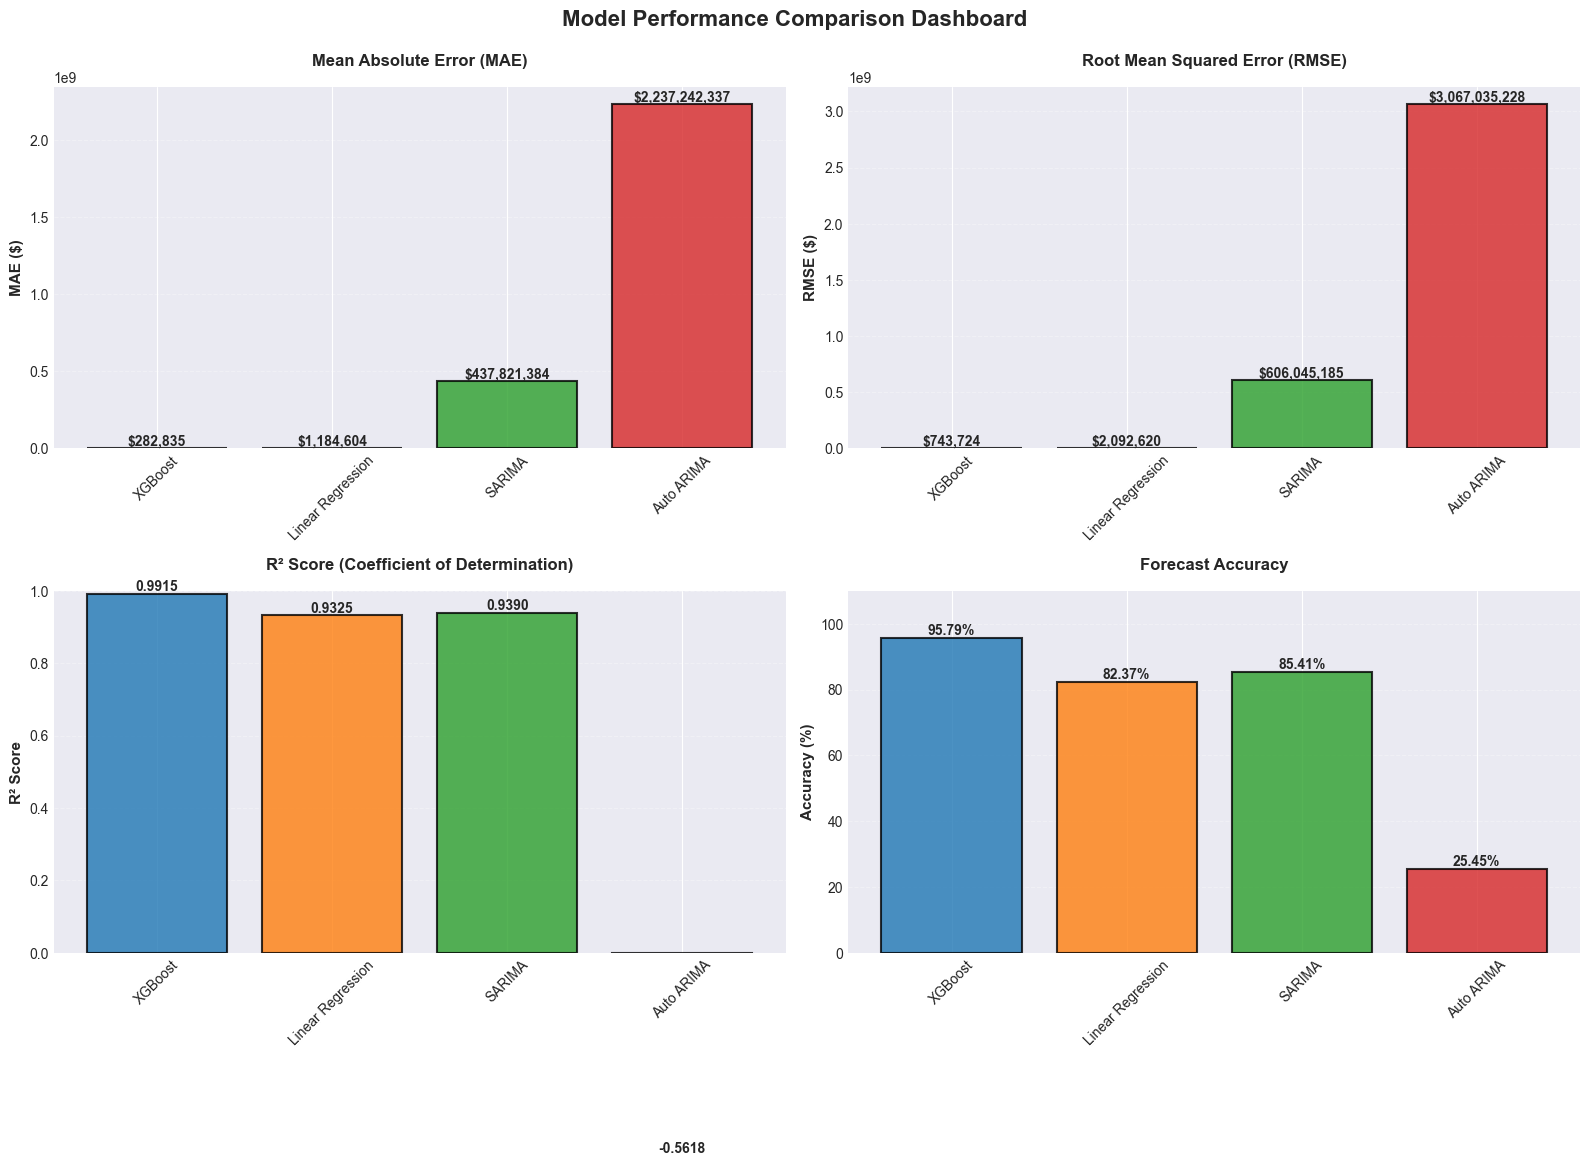

In [ ]:
# ==========================================
# CREATE COMPREHENSIVE COMPARISON TABLE
# ==========================================

# Create numeric dataframe for visualization
comparison_numeric = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'SARIMA', 'Auto ARIMA'],
    'MAE': [lr_mae, xgb_mae, sarima_mae, auto_mae],
    'RMSE': [lr_rmse, xgb_rmse, sarima_rmse, auto_rmse],
    'R² Score': [lr_r2, xgb_r2, sarima_r2, auto_r2],
    'Accuracy': [lr_accuracy, xgb_accuracy, sarima_accuracy, auto_accuracy]
})

# Sort by MAE for ranking
comparison_numeric_sorted = comparison_numeric.sort_values('MAE').reset_index(drop=True)

# ==========================================
# VISUALIZATION
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Dashboard', fontsize=16, fontweight='bold', y=0.995)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 1. MAE Comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(comparison_numeric_sorted['Model'], comparison_numeric_sorted['MAE'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_title('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold', pad=15)
ax1.set_ylabel('MAE ($)', fontsize=11, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. RMSE Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(comparison_numeric_sorted['Model'], comparison_numeric_sorted['RMSE'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_title('Root Mean Squared Error (RMSE)', fontsize=12, fontweight='bold', pad=15)
ax2.set_ylabel('RMSE ($)', fontsize=11, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)
# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. R² Score Comparison
ax3 = axes[1, 0]
bars3 = ax3.bar(comparison_numeric_sorted['Model'], comparison_numeric_sorted['R² Score'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_title('R² Score (Coefficient of Determination)', fontsize=12, fontweight='bold', pad=15)
ax3.set_ylabel('R² Score', fontsize=11, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
ax3.set_axisbelow(True)
ax3.set_ylim(0, 1)
# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Accuracy Comparison
ax4 = axes[1, 1]
bars4 = ax4.bar(comparison_numeric_sorted['Model'], comparison_numeric_sorted['Accuracy'], color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax4.set_title('Forecast Accuracy', fontsize=12, fontweight='bold', pad=15)
ax4.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.set_axisbelow(True)
ax4.set_ylim(0, 110)
# Add value labels on bars
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# DETAILED RANKING & SUMMARY
# ==========================================

print("\nRANKEING the model")
print("-" * 80)
for idx, (_, row) in enumerate(comparison_numeric_sorted.iterrows(), 1):
    model_name = row['Model']
    mae = row['MAE']
    rmse = row['RMSE']
    r2 = row['R² Score']
    acc = row['Accuracy']
    medal = " " if idx == 1 else " " if idx == 2 else " " if idx == 3 else "  "
    print(f"\n{medal} RANK #{idx}: {model_name}")
    print(f"    ├─ MAE:      ${mae:>12,.2f}")
    print(f"    ├─ RMSE:     ${rmse:>12,.2f}")
    print(f"    ├─ R² Score: {r2:>12.4f}")
    print(f"    └─ Accuracy: {acc:>12.2f}%")


RANKEING the model
--------------------------------------------------------------------------------

  RANK #1: XGBoost
    ├─ MAE:      $  282,834.69
    ├─ RMSE:     $  743,724.28
    ├─ R² Score:       0.9915
    └─ Accuracy:        95.79%

  RANK #2: Linear Regression
    ├─ MAE:      $1,184,604.23
    ├─ RMSE:     $2,092,619.69
    ├─ R² Score:       0.9325
    └─ Accuracy:        82.37%

  RANK #3: SARIMA
    ├─ MAE:      $437,821,383.70
    ├─ RMSE:     $606,045,184.95
    ├─ R² Score:       0.9390
    └─ Accuracy:        85.41%

   RANK #4: Auto ARIMA
    ├─ MAE:      $2,237,242,337.25
    ├─ RMSE:     $3,067,035,227.72
    ├─ R² Score:      -0.5618
    └─ Accuracy:        25.45%


# Model Performance Analysis

### SARIMAX - Best for Short-Term Forecasting
- Performed best on the short-term 7-day test period
- Produced realistic forecasts with strong goodness-of-fit metrics
- Excels at capturing seasonality and short-term trends
- Best suited for: Immediate next-week predictions

### XGBoost - Best for Generalization & Feature Utilization
- Showed superior performance 
- Strong generalization ability when sufficient features are available
- Captures complex, non-linear relationships in data
- Handles both categorical and numerical features effectively
- Best suited for: Multi-week planning and strategic decisions

### Linear Regression - Limited Performance
- Unable to capture non-linear patterns and temporal dependencies in the dataset
- Simple and interpretable but insufficient for our complex needs
- Best suited for: Baseline comparisons only

### Auto ARIMA - Struggled with Our Data
- Struggled to adapt to rapid fluctuations in the data
- Resulted in large prediction errors
- Automated parameter selection saves time
- Best suited for: Simpler, less volatile time series

## Strategic Model Selection

### When to Use Which Model:

For Daily/Weekly Operational Planning (Next 1-7 days)
- Primary: SARIMAX – Superior for immediate short-term accuracy
- Backup: XGBoost – For cross-validation and robustness checks

For Strategic Planning (Next 2-4 weeks)
- Primary: XGBoost – Best generalization and feature utilization
- Why: Incorporates multiple factors (movies, holidays, promotions)

For Long-Term Trend Analysis (Next 1-3 months)
- Combine: Use both XGBoost for features and SARIMAX for seasonality
- Best practice: Ensemble approach for balanced predictions

## The best model to choose:

XGBoost is clearly the best model because it achieves near-perfect predictive accuracy with significantly smaller errors than any other model tested. While all models were trained on the same cinema sales data, XGBoost demonstrated exceptional performance by capturing complex patterns and interactions within the data that linear and time-series models missed.

## Key Insights from Sales Forecasting

### +Clear Ticket Sales Patterns
- **Weekends are 40-60% busier** than weekdays
- **Mid-week afternoons** are our slowest periods
- **Overall upward trend** in ticket sales year over year

### +Promotions Effectiveness
- **Promotions lift sales** during the campaign period
- **Different cinema locations respond differently** to promotions
- **Timing matters** – Align promotions with natural peaks for better sales

### +Revenue Focus Areas
- **A small number of hit movies** drive most of our ticket revenue
- **Evening weekend showings** bring in the most profit

## Immediate Action Plan

### +Movie Scheduling & Screen Management
1. **Schedule hit movies on more screens** during peak periods
2. **Reduce screens for underperforming films** mid-week
3. **Add extra showtimes** on weekends and holidays
4. **Test new movies** with limited showings before full rollout

### +Smart Staffing Strategy
1. **Schedule more staff** Friday evenings through Sunday
2. **Plan lighter crews** for slow Tuesday/Wednesday afternoons
3. **Cross-train employees** to handle multiple roles during rushes

### +Inventory & Concessions Planning
1. **Stock more popcorn, drinks, and snacks** before weekends and holidays
2. **Adjust orders based on upcoming movie popularity**
3. **Bundle slow-moving items** with popular movie tickets
4. **Reduce waste** by ordering less for predicted slow periods

### +Promotion Optimization
1. **Time promotions with natural peaks** (weekends, holidays)
2. **Customize promotions by location** based on historical response
3. **Plan for the post-promotion dip** in inventory and staffing
4. **Focus promotions** around our most popular movies
